# Pseudospectral tutorial, part 2
## Les Houches, summer 2017


A gentle stroll through pseudospectral methods: solving $\partial_t \zeta + J(\psi, \zeta) = \nu \nabla^4\zeta$, where $\zeta = \nabla^2\psi$.



First load the package for plotting.

In [5]:
using PyPlot

We create the physical grid $x$, $y$ (as in the Differentiation notebook). Also, we create the wavenumber grid.

In [19]:
nx, ny = 256, 256               # number of grid points
Lx, Ly = 2.0*pi, 2.0*pi       # size of the domain in each direction

# constructing the physical grid (x,y)
dx, dy = Lx/nx, Ly/ny
 x = 0:dx:Lx-dx
 y = 0:dy:Ly-dy

X  = zeros(nx,ny)
Y  = zeros(nx,ny)
for j in 1:ny, i in 1:nx
     X[i, j] = x[i]
     Y[i, j] = y[j]
end

# constructing the wavenumber grid (k,l)
k  = 2.0*pi/Lx * [0:nx/2; -nx/2+1:-1];
l  = 2.0*pi/Ly * [0:ny/2; -ny/2+1:-1];

k0 = 2.0*pi/Lx            # the fundamental x-wavenumber
l0 = 2.0*pi/Ly            # the fundamental y-wavenumber

K = zeros(nx, ny)
L = zeros(nx, ny)
for j in 1:ny, i in 1:nx
    K[i, j] = k[i]
    L[i, j] = l[j]
end

ksq = K.^2 + L.^2

invksq = 1./ksq
invksq[1,1] = 0;

filter = zeros(nx, ny)
for j in 1:ny, i in 1:nx
    if ksq[i,j] < (nx/3)^2
        filter[i, j] = 1
    end
end


Let's define some parameters.

In [20]:
    nu = 5.0e-7
    nu = 5.0e-5
    dt = 0.01
  tfin = 50
nstep  = Int(tfin/dt) + 1;

t = 0:dt:tfin;

Prescribe an initial condition for $\zeta$ and plot it.

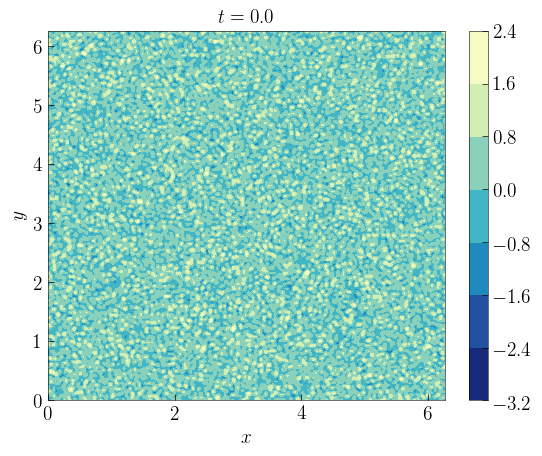

In [21]:
q0 = randn(nx, ny)
qh = fft(q0).*filter
q0 = real(ifft(qh))

j=1

time = t[j]
figure(1)
contourf(X, Y, q0)
xlabel(L"$x$")
ylabel(L"$y$")
title("\$t = $time \$")
draw()
colorbar();

Time-step $\zeta$ forward for $nstep$ times.

In [22]:
for j = 2:nstep
    
    psih = -invksq.*qh
       q =  real(ifft(qh))
       u = -real(ifft(im*L.*psih))
       v =  real(ifft(im*K.*psih))
     rhs = -im*K.*fft(u.*q) -im*L.*fft(v.*q) - nu*ksq.*qh -2.0*im*K.*psih
    
    qh = qh + dt*rhs
    qh = qh.*filter
end

Plot the final state.

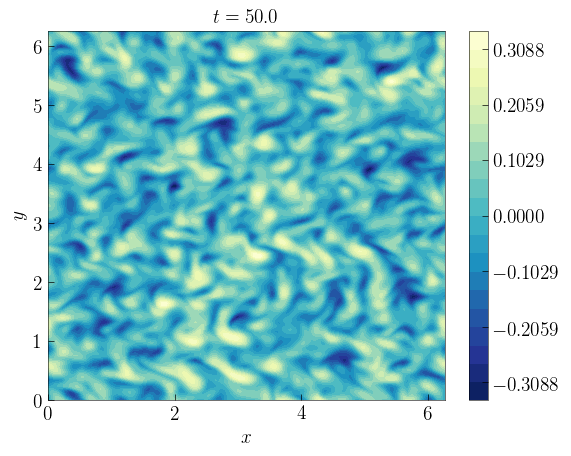

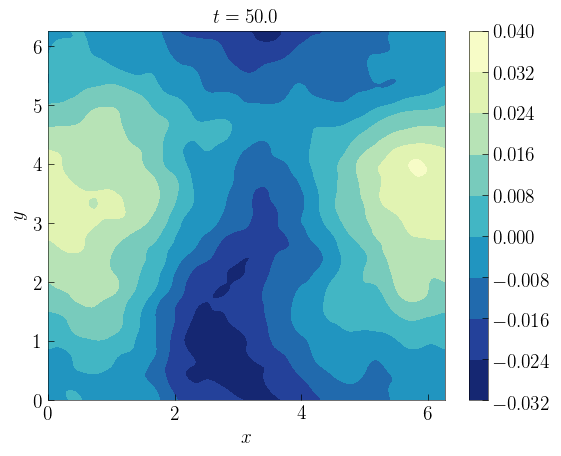

In [23]:
time = t[j]
   q = real(ifft(qh))
 psi = real(ifft(-invksq.*qh))
maxq = maximum(abs.(q))
levs = linspace(-maxq, maxq, 21)


fig = figure(1)
contourf(X, Y, q, levs)
title("\$t = $time \$")
xlabel(L"$x$")
ylabel(L"$y$")
draw()
colorbar();

fig = figure(2)
contourf(X, Y, psi)
title("\$t = $time \$")
xlabel(L"$x$")
ylabel(L"$y$")
draw()
colorbar();